In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
import os
import numpy as np
from sklearn.metrics import confusion_matrix

In [4]:
# # The Copied Data is in zip File, therefore, it has to be unzipped/extracted
# import zipfile
# zip_ref = zipfile.ZipFile(r'/content/drive/MyDrive/Colab Notebooks/FER-2013.zip')
# custom_extraction_directory = (r'/content/drive/MyDrive/Colab Notebooks/FER Extracted Folder')
# zip_ref.extractall(custom_extraction_directory)
# zip_ref.close()

In [4]:
train_data_dir = r'/content/drive/MyDrive/Colab Notebooks/FER Extracted Folder/train'
test_data_dir = r'/content/drive/MyDrive/Colab Notebooks/FER Extracted Folder/test'


train_datagen = ImageDataGenerator(
    train_data_dir,
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    test_data_dir,
    rescale=1./255
)


train_ds = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_ds = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

img,label = train_ds.__next__()

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [6]:
# Counting how many images in train and test folder
train_path = r'D:\AI&DS Chapter\Modules\Module 5- Computer Vision\Lab & Datasets\Projects\Project Dataset'
test_path = r'D:\AI&DS Chapter\Modules\Module 5- Computer Vision\Lab & Datasets\Projects\Project Dataset'

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(train_ds, validation_data=validation_ds, epochs=32, callbacks=[early_stopping])

Epoch 1/32
898/898 [==============================] - 83s 87ms/step - loss: 1.7796 - accuracy: 0.2634 - val_loss: 1.7513 - val_accuracy: 0.2772
Epoch 2/32
898/898 [==============================] - 76s 84ms/step - loss: 1.6771 - accuracy: 0.3253 - val_loss: 1.5976 - val_accuracy: 0.3902
Epoch 3/32
898/898 [==============================] - 77s 86ms/step - loss: 1.5443 - accuracy: 0.3970 - val_loss: 1.4583 - val_accuracy: 0.4437
Epoch 4/32
898/898 [==============================] - 75s 84ms/step - loss: 1.4464 - accuracy: 0.4410 - val_loss: 1.3762 - val_accuracy: 0.4733
Epoch 5/32
898/898 [==============================] - 82s 92ms/step - loss: 1.3827 - accuracy: 0.4663 - val_loss: 1.3373 - val_accuracy: 0.4876
Epoch 6/32
898/898 [==============================] - 83s 93ms/step - loss: 1.3429 - accuracy: 0.4826 - val_loss: 1.3106 - val_accuracy: 0.4967
Epoch 7/32
898/898 [==============================] - 76s 85ms/step - loss: 1.3103 - accuracy: 0.5007 - val_loss: 1.2875 - val_accuracy:

In [7]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(validation_ds)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

225/225 [==============================] - 15s 65ms/step - loss: 1.1276 - accuracy: 0.5709
Validation Loss: 1.127570629119873
Validation Accuracy: 0.5709111094474792


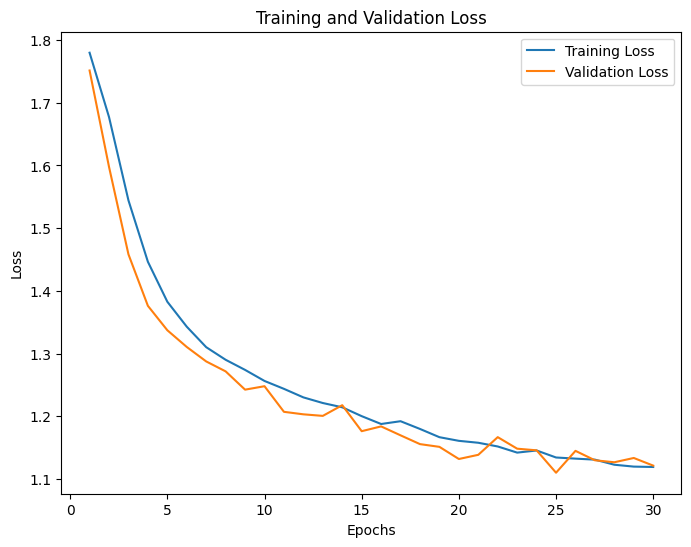

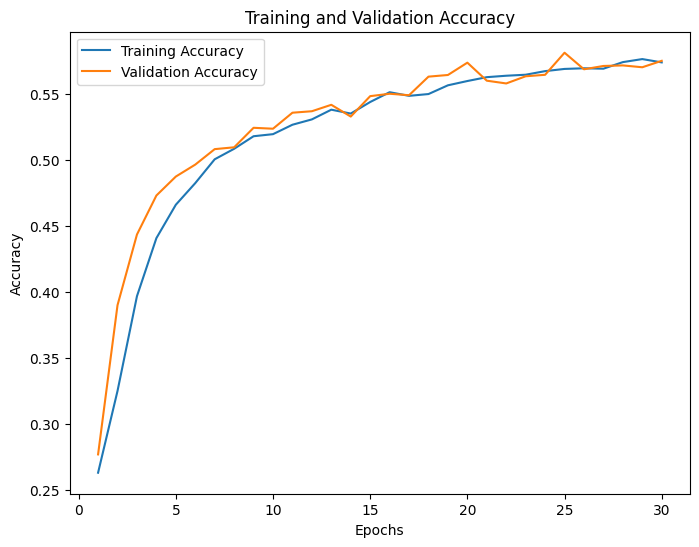

In [8]:
import matplotlib.pyplot as plt

# Get the training and validation metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [10]:


# Make predictions using the trained model on the validation data
predictions = model.predict(validation_ds)

# Convert predictions to class labels (indexes with the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels of the validation data
true_labels = validation_ds.classes

# Create the confusion matrix using scikit-learn
# from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print(conf_matrix)

# The confusion matrix provides a detailed representation of the model's predictions on the validation data.
# It is a 7x7 matrix where each row represents the true class labels, and each column represents the predicted class labels.

# Interpretation of the confusion matrix:
'''
Row 1: The true class labels for the "Angry" emotion.
The model correctly predicted 155 instances as "Angry,"
but it misclassified 4 as "Disgust," 79 as "Fear," 230 as "Happy," 182 as "Neutral," 214 as "Sad," and 94 as "Surprise."

Row 2: The true class labels for the "Disgust" emotion.
The model did not correctly predict any instances as "Disgust."
It misclassified 12 as "Angry," 33 as "Fear," 16 as "Happy," 29 as "Neutral," and 14 as "Sad" and "Surprise."

Row 3: The true class labels for the "Fear" emotion.
The model correctly predicted 79 instances as "Fear,"
but it misclassified 9 as "Angry," 144 as "Disgust," 275 as "Happy," 181 as "Neutral," 223 as "Sad," and 113 as "Surprise."

Rows 4-7: The true class labels for the "Happy," "Neutral," "Sad," and "Surprise" emotions.
The pattern continues for these rows, with correct predictions on the diagonal and misclassifications in the off-diagonal cells.

Regarding your second question, the confusion matrix can vary slightly each time you run the evaluation on the validation data.
This variation is due to the random initialization of the model's parameters and the shuffling of data during the evaluation process.
However, if the model and the validation data remain the same and there are no changes in the training process,
the confusion matrix should be relatively consistent with minor variations.
'''

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


225/225 [==============================] - 23s 100ms/step
[[155   4  79 230 182 214  94]
 [ 12   0   7  33  16  29  14]
 [144   9  79 275 181 223 113]
 [254  11 132 489 294 371 223]
 [161   7  89 336 221 258 161]
 [175   6 101 358 212 263 132]
 [103   4  60 241 150 177  96]]


In [30]:
# Save the model to a file
model.save("/content/drive/MyDrive/Colab Notebooks/Models.h5")

1/1 [==============================] - 0s 33ms/step


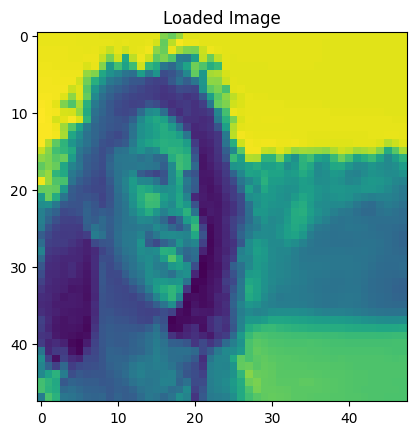

Image Shape: (1, 48, 48, 1)
Predicted class index: 3
Predicted class label: happy


In [38]:
#   PREDICTION

# Step 1: Load and preprocess the image
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

# Step 1: Load and preprocess the image
# Load the unseen image and preprocess it
image_path = '/content/drive/MyDrive/Colab Notebooks/Testing Image/H.jpeg'  # Replace this with the path to your unseen image
img = Image.open(image_path).convert('L')  # Convert the image to grayscale
img = img.resize((48, 48))  # Resize to the target size used during training
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Step 2: Make predictions
predictions = model.predict(img_array)

# Step 3: Get the predicted label
predicted_label = np.argmax(predictions[0])


# Display the loaded image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('on')  # Hide axis values
plt.show()

# Get the shape of the image
print("Image Shape:", img_array.shape)

 # Step 3: Get the predicted class

  # Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions[0])

  # You can then use this index to get the class label from your dataset
class_labels = train_ds.class_indices  # This is a dictionary mapping class names to indices
predicted_class_label = list(class_labels.keys())[predicted_class_index]

print("Predicted class index:", predicted_class_index)
print("Predicted class label:", predicted_class_label)